### NIVELL 1

+ Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flights_clean.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,4,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,4,07:54,07:35,10:02,10:00,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,4,06:28,06:20,08:04,07:50,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,2008,1,3,4,19:40,19:15,21:21,21:10,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df,test_size=0.3) # split 30% of DATA

In [6]:
train.shape, test.shape

((1349856, 18), (578510, 18))

In [7]:
round(100*len(train)/len(df),1),round(100*len(test)/len(df),1)

(70.0, 30.0)

In [8]:
train.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance
count,1349856.0,1349856.00,1349856.00,1349856.00,1349856.00,1349856.00,1349856.00,1349856.00,1349856.00,1349856.00
mean,2008.0,6.11,15.75,3.99,2183.88,133.34,134.24,42.21,43.11,765.20
std,0.0,3.48,8.78,2.00,1944.12,72.08,71.27,56.90,53.37,574.07
min,2008.0,1.00,1.00,1.00,1.00,14.00,-21.00,-109.00,6.00,11.00
25%,2008.0,3.00,8.00,2.00,611.00,80.00,82.00,9.00,12.00,338.00
50%,2008.0,6.00,16.00,4.00,1543.00,116.00,116.00,24.00,24.00,606.00
75%,2008.0,9.00,23.00,6.00,3422.00,165.00,165.00,56.00,53.00,998.00
max,2008.0,12.00,31.00,7.00,9740.00,776.00,660.00,2453.00,2467.00,4962.00


In [9]:
test.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance
count,578510.0,578510.00,578510.00,578510.00,578510.00,578510.00,578510.00,578510.00,578510.00,578510.00
mean,2008.0,6.11,15.75,3.98,2185.27,133.23,134.11,42.17,43.05,764.37
std,0.0,3.48,8.78,2.00,1945.21,72.01,71.14,56.52,53.01,573.45
min,2008.0,1.00,1.00,1.00,1.00,16.00,9.00,-69.00,6.00,11.00
25%,2008.0,3.00,8.00,2.00,610.00,80.00,81.00,9.00,12.00,338.00
50%,2008.0,6.00,16.00,4.00,1542.50,116.00,116.00,24.00,24.00,606.00
75%,2008.0,9.00,23.00,6.00,3427.00,165.00,165.00,56.00,53.00,997.00
max,2008.0,12.00,31.00,7.00,9741.00,1114.00,660.00,2461.00,2457.00,4962.00


Text(0.5, 1.0, 'TRAINING SET')

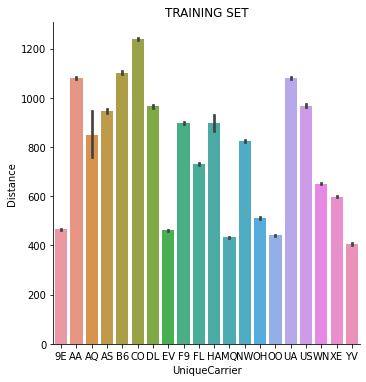

In [10]:
sns.catplot(x='UniqueCarrier',y = 'Distance',data=train.sort_values(by='UniqueCarrier'),kind='bar')
plt.title ('TRAINING SET')

Text(0.5, 1.0, 'TESTING SET')

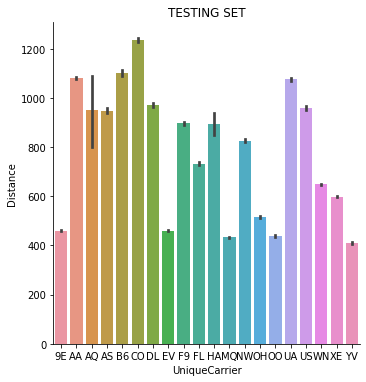

In [11]:
sns.catplot(x='UniqueCarrier',y = 'Distance',data=test.sort_values(by='UniqueCarrier'),kind='bar')
plt.title('TESTING SET')

+ valors similars es poden veure pel train o test data

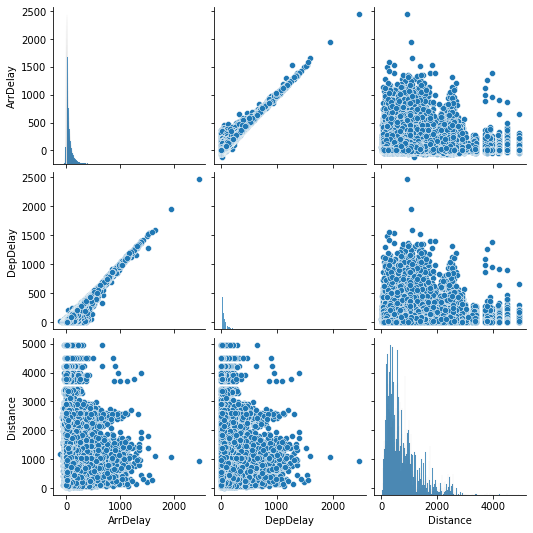

In [12]:
sns.pairplot(train[['ArrDelay','DepDelay','Distance']])

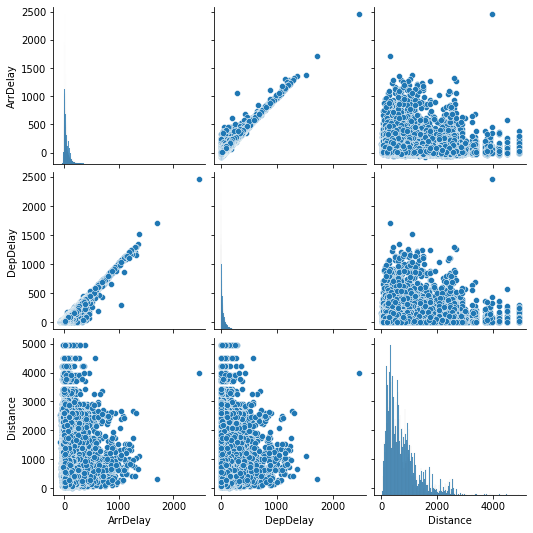

In [13]:
sns.pairplot(test[['ArrDelay','DepDelay','Distance']])

### Nivell 2

 + Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [14]:
df1= df.copy()

In [15]:
days_week = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}

In [16]:
#transformem aquesta variable a categorica
df1['DayOfWeek'] = df1['DayOfWeek'].map(days_week).astype('category')

In [17]:
# ordenem els dies de la setmana
df1['DayOfWeek'].cat.set_categories(["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"],ordered=True)

0          Thursday
1          Thursday
2          Thursday
3          Thursday
4          Thursday
             ...   
1928361    Saturday
1928362    Saturday
1928363    Saturday
1928364    Saturday
1928365    Saturday
Name: DayOfWeek, Length: 1928366, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [18]:
df1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,Thursday,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,Thursday,07:54,07:35,10:02,10:00,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,Thursday,06:28,06:20,08:04,07:50,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,2008,1,3,Thursday,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,2008,1,3,Thursday,19:40,19:15,21:21,21:10,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [19]:
# utilitzem OneHotEncoder per aquesta variable categorica
df2 = pd.get_dummies(df1, columns=['UniqueCarrier'],prefix="",drop_first=False,prefix_sep='')

In [20]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,2008,1,3,Thursday,20:03,19:55,22:11,22:25,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008,1,3,Thursday,07:54,07:35,10:02,10:00,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2008,1,3,Thursday,06:28,06:20,08:04,07:50,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2008,1,3,Thursday,18:29,17:55,19:59,19:25,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2008,1,3,Thursday,19:40,19:15,21:21,21:10,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
# aquestes dues columnes no farem servir cap encoder perque surtirien moltes columnes
df2.TailNum.nunique(),df2.FlightNum.nunique()

(5360, 7498)

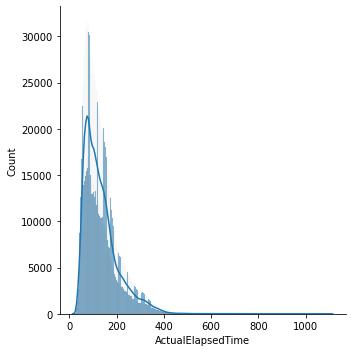

In [22]:
# explorem visualment les variables numericas 
sns.displot(df2['ActualElapsedTime'],alpha=0.5,kind='hist',kde=True)

In [23]:
df2['ElapseTime_faster_than_CRS'] = df2['ActualElapsedTime']- df2['CRSElapsedTime']

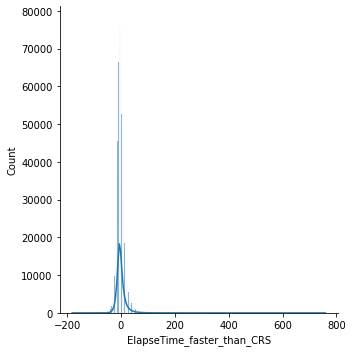

In [24]:
# explorem visualment les variables numericas 
sns.displot(df2['ElapseTime_faster_than_CRS'],kind='hist',kde=True)

In [25]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,ElapseTime_faster_than_CRS
0,2008,1,3,Thursday,20:03,19:55,22:11,22:25,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-22.0
1,2008,1,3,Thursday,07:54,07:35,10:02,10:00,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-17.0
2,2008,1,3,Thursday,06:28,06:20,08:04,07:50,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0
3,2008,1,3,Thursday,18:29,17:55,19:59,19:25,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
4,2008,1,3,Thursday,19:40,19:15,21:21,21:10,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-14.0


+ ActualElapsedTime no segueix una distribucio normal (skew a la dreta), apliquen una transformacio np.sqrt() o np.log() per veure com queda

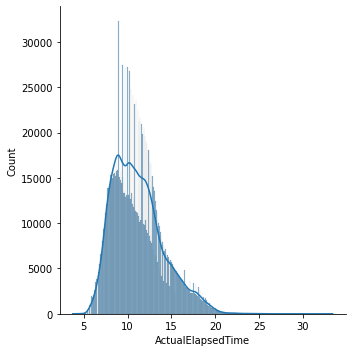

In [26]:
sns.displot(df2['ActualElapsedTime'].apply(np.sqrt),alpha=0.5,kind='hist',kde=True)

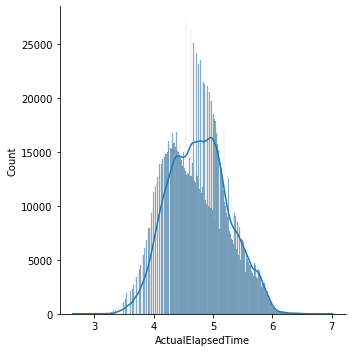

In [27]:
sns.displot(df2['ActualElapsedTime'].apply(np.log),alpha=0.5,kind='hist',kde=True)

+ em quedo amb la transformacio np.log perque es la que sembla tenir una distribucio mes "normal"

In [28]:
df2['log_ActualElapsedTime']= df2['ActualElapsedTime'].apply(np.log)

In [29]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,ElapseTime_faster_than_CRS,log_ActualElapsedTime
0,2008,1,3,Thursday,20:03,19:55,22:11,22:25,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-22.0,4.852030
1,2008,1,3,Thursday,07:54,07:35,10:02,10:00,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-17.0,4.852030
2,2008,1,3,Thursday,06:28,06:20,08:04,07:50,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,4.564348
3,2008,1,3,Thursday,18:29,17:55,19:59,19:25,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,4.499810
4,2008,1,3,Thursday,19:40,19:15,21:21,21:10,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-14.0,4.615121


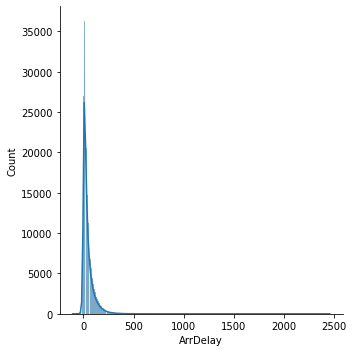

In [30]:
sns.displot(df2['ArrDelay'],kind='hist',kde=True)

+ ArrDelay o DepDelay te valors negatius i no podem aplicar transformacio np.log() o np.sqrt()

+ podem aplicar una transformacio del tipus  PowerTransformer (method='yeo-johnson') que serveix tant per valors positius com negatius


In [31]:
from sklearn.preprocessing import PowerTransformer

In [32]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,ElapseTime_faster_than_CRS,log_ActualElapsedTime
0,2008,1,3,Thursday,20:03,19:55,22:11,22:25,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-22.0,4.852030
1,2008,1,3,Thursday,07:54,07:35,10:02,10:00,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-17.0,4.852030
2,2008,1,3,Thursday,06:28,06:20,08:04,07:50,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,4.564348
3,2008,1,3,Thursday,18:29,17:55,19:59,19:25,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,4.499810
4,2008,1,3,Thursday,19:40,19:15,21:21,21:10,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-14.0,4.615121


In [33]:
model = PowerTransformer(method='yeo-johnson')
cols_num=['ArrDelay','DepDelay']

X_numerical = pd.DataFrame(model.fit_transform(df2[cols_num]),columns=cols_num)
X_numerical.head()

,ArrDelay,DepDelay
0,-2.527572,-1.334763
1,-0.774462,-0.275947
2,-0.392294,-1.334763
3,0.053534,0.355366
4,-0.473011,0.030462


In [34]:
df3 = pd.concat([df2.drop(cols_num,axis=1),X_numerical],axis=1)

In [35]:
df3.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,Origin,Dest,Distance,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,ElapseTime_faster_than_CRS,log_ActualElapsedTime,ArrDelay,DepDelay
0,2008,1,3,Thursday,20:03,19:55,22:11,22:25,335,N712SW,128.0,150.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-22.0,4.852030,-2.527572,-1.334763
1,2008,1,3,Thursday,07:54,07:35,10:02,10:00,3231,N772SW,128.0,145.0,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-17.0,4.852030,-0.774462,-0.275947
2,2008,1,3,Thursday,06:28,06:20,08:04,07:50,448,N428WN,96.0,90.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,4.564348,-0.392294,-1.334763
3,2008,1,3,Thursday,18:29,17:55,19:59,19:25,3920,N464WN,90.0,90.0,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,4.499810,0.053534,0.355366
4,2008,1,3,Thursday,19:40,19:15,21:21,21:10,378,N726SW,101.0,115.0,IND,JAX,688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-14.0,4.615121,-0.473011,0.030462


In [36]:
df3.drop(['DepTime','CRSDepTime','ArrTime','CRSArrTime'],axis=1,inplace=True)
df3.drop(['ActualElapsedTime','CRSElapsedTime'],axis=1,inplace=True)

In [37]:
df3.head()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,TailNum,Origin,Dest,Distance,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,ElapseTime_faster_than_CRS,log_ActualElapsedTime,ArrDelay,DepDelay
0,2008,1,3,Thursday,335,N712SW,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-22.0,4.852030,-2.527572,-1.334763
1,2008,1,3,Thursday,3231,N772SW,IAD,TPA,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-17.0,4.852030,-0.774462,-0.275947
2,2008,1,3,Thursday,448,N428WN,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,4.564348,-0.392294,-1.334763
3,2008,1,3,Thursday,3920,N464WN,IND,BWI,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,4.499810,0.053534,0.355366
4,2008,1,3,Thursday,378,N726SW,IND,JAX,688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-14.0,4.615121,-0.473011,0.030462


### Nivell 3

- Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

Text(0.5, 1.0, 'Number of Flights according to the day of the week')

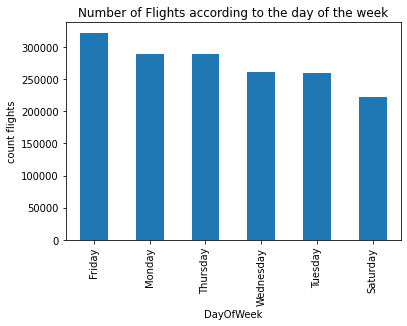

In [38]:
total_week= df3.groupby('DayOfWeek')['DayOfWeek'].count().sort_values(ascending=False)

total_week.plot.bar()
plt.ylabel('count flights')
plt.title('Number of Flights according to the day of the week')

+ numero de vols depenent del dia de la setmana, surten mes vols el Divendres y menys vols el Dissabte
+ no hi ha constancia de vols els diumenges

Text(0.5, 1.0, 'Number of Flights according to their Unique Carrier')

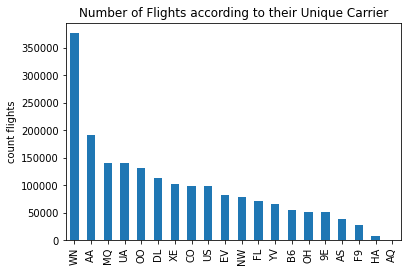

In [39]:
total_carrier =  df3[['9E','AA','AQ','AS','B6','CO','DL','EV','F9','FL','HA','MQ','NW','OH','OO','UA','US','WN','XE','YV']].sum().sort_values(ascending=False)

total_carrier.plot.bar()
plt.ylabel('count flights')
plt.title('Number of Flights according to their Unique Carrier')

+ Quin dia de la setmana tenim mes vols retrassats?

Text(0.5, 1.0, 'Flights with  ArrDelay')

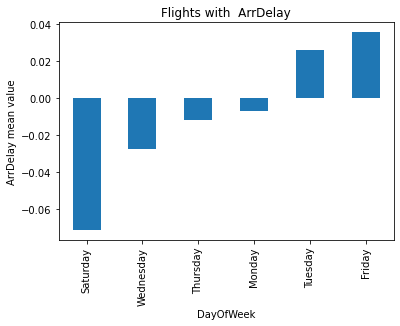

In [40]:
delay_week = df3.groupby(by='DayOfWeek')['ArrDelay'].mean().sort_values(ascending=True)

delay_week.plot.bar()
plt.ylabel('ArrDelay mean value')
plt.title('Flights with  ArrDelay')


+ sembla que el Divendres es el dia que té mes ArrDelay mentre que el dissabte el que menys

Text(0.5, 1.0, 'Flights with  DepDelay')

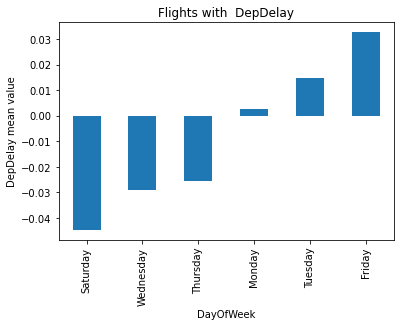

In [41]:
delay_week = df3.groupby(by='DayOfWeek')['DepDelay'].mean().sort_values(ascending=True)

delay_week.plot.bar()
plt.ylabel('DepDelay mean value')
plt.title('Flights with  DepDelay')


+ Pel que fa a la variable DepDelay es molt similar a ArrDelay

Text(0.5, 1.0, 'Flights according to their Unique Carrier')

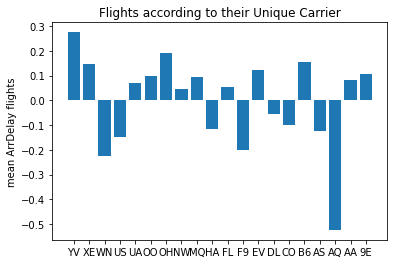

In [42]:
carriers =['9E','AA','AQ','AS','B6','CO','DL','EV','F9','FL','HA','MQ','NW','OH','OO','UA','US','WN','XE','YV']
delay_carrier = df3.groupby(carriers)['ArrDelay'].mean()
new = carriers[::-1]
#print(delay_carrier)
plt.bar(new,delay_carrier)
#plt.xticks(np.arange(len(new),new))
plt.ylabel('mean ArrDelay flights')
plt.title('Flights according to their Unique Carrier')

+ el Carrier que acumula mes ArrDelay es YV i el que menys es AQ

Text(0.5, 1.0, 'Flights according to their Unique Carrier')

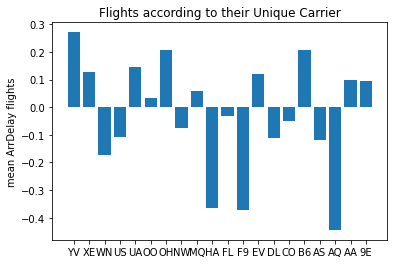

In [43]:
delay_carrier = df3.groupby(carriers)['DepDelay'].mean()
new = carriers[::-1]
#print(delay_carrier)
plt.bar(new,delay_carrier)
#plt.xticks(np.arange(len(new),new))
plt.ylabel('mean ArrDelay flights')
plt.title('Flights according to their Unique Carrier')

+ el Carrier que acumula mes DepDelay es YV i el que menys es AQ

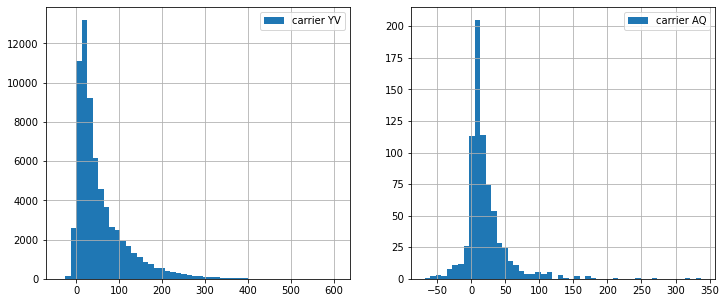

In [44]:
fig,ax = plt.subplots(ncols=2,figsize=(12,5))
df[df3.YV==1]['ArrDelay'].hist(bins=50,ax=ax[0],label='carrier YV')
ax[0].legend()
df[df3.AQ==1]['ArrDelay'].hist(bins=50,ax=ax[1],label='carrier AQ')
plt.legend()